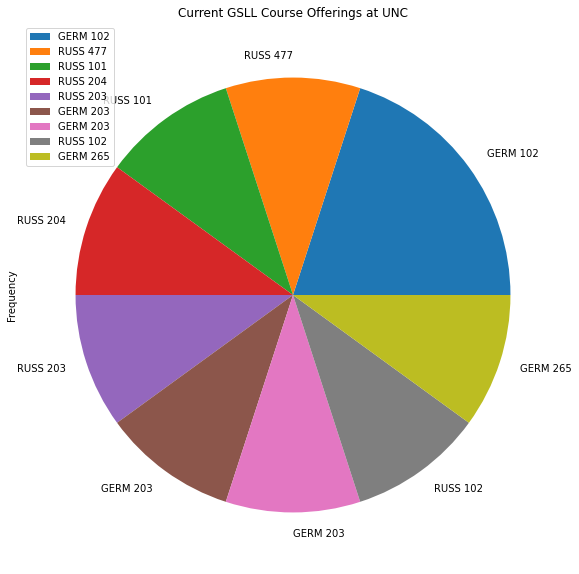

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

def funct(url):
    page = requests.get(
    url)
    soup = BeautifulSoup(page.content, 'html.parser')
    courses = []
    for element in soup.select('h3'):
        if(element.text != ''):
            courses.append(element.text)
    courses.pop(0)
    courses.pop()
    return courses
    
list = funct("https://gsll.unc.edu/courses/current-courses/")
classes = []
for i in list:
        leng = len(list)
        x = leng - 8
        classes.append(i[:leng - x])
        
df = pd.DataFrame(classes, columns = ['Courses'])
df = df['Courses'].value_counts().reset_index()
df = df.rename(columns={'index':'Courses','Courses': 'Frequency'})
df = df.set_index('Courses')
plot = df.plot.pie(y='Frequency', figsize=(10, 10), title = "Current GSLL Course Offerings at UNC")

In [80]:
import re
def courseCatScrape(url):
    page = requests.get(
    url)
    soup = BeautifulSoup(page.content, 'html.parser')
    courses = []
    classes = soup.select('div.courseblock')
    for course in classes:
        info = course.select('p', class_= 'courseblocktitle')[0].text.strip()
        code = info.split('.')[0]
        name = info.split('.')[1]
        credit = info.split('.')[2]
        credit = int(re.search(r'\d+', credit).group())
        genEd = course.select('p', class_="courseblockdesc")[1].text.strip()
        
        if('Ed: 'in genEd):
            x = genEd.index('Ed:')
            sub = genEd[x+4: ]
            x = sub.index('.')
            gen = sub[0:x]
        else:
            gen = 'None'
        
        courses.append({
        "code": code,
        "name": name,
        "credit": credit,
        "genEd": gen
        })
    return courses
    
roml = courseCatScrape("https://catalog.unc.edu/courses/roml/")
roml = pd.DataFrame(roml)
gsll = courseCatScrape("https://catalog.unc.edu/courses/gsll/")
gsll = pd.DataFrame(gsll)
wolo = courseCatScrape("https://catalog.unc.edu/courses/wolo/")
wolo = pd.DataFrame(wolo)
gsll.genEd

0                LA, CI, NA
1                    HS, GL
2                    LA, NA
3                HS, NA, WB
4                    LA, NA
              ...          
63                     None
64                     None
65    EE- Mentored Research
66    EE- Mentored Research
67    EE- Mentored Research
Name: genEd, Length: 68, dtype: object